<a href="https://colab.research.google.com/github/P-Dammy/Gradual-Unfreezing-in-Transfer-Learning-for-Image-Recognition-on-CIFAR-10/blob/main/Gradual_Unfreezing_in_Transfer_Learning_for_Image_Recognition_on_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the data and other necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Combining train and test sets for Exploratory Data Analysis
X = np.concatenate([X_train, X_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


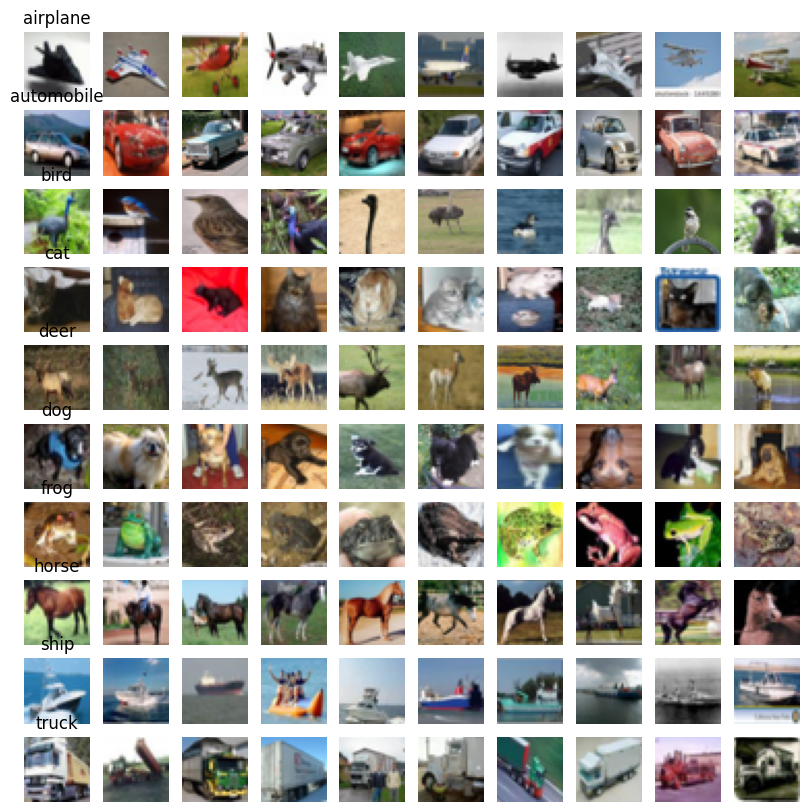

In [3]:
# Plotting sample images from each class
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_sample_images(X, y, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(10):
        idx = np.where(y == i)[0][:10]  # Get 10 samples from each class
        for j in range(10):
            plt.subplot(10, 10, i * 10 + j + 1)
            plt.imshow(X[idx[j]])
            plt.axis('off')
            if j == 0:
                plt.title(class_names[i])
    plt.show()

plot_sample_images(X, y, class_names)


In [4]:
# Normalizing the pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Converting class vectors to binary class matrices (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Splitting the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [13]:
# Introducing transfer learning into the model training.
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# Loading a pre-trained model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Adding layers on top of the pre-trained model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Freezing the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Train with frozen base model for a few epochs
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), batch_size=64)

# Unfreezing layers and continue training
for layer in base_model.layers:
    layer.trainable = True
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=64)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.1152 - loss: 2.5180 - val_accuracy: 0.1981 - val_loss: 2.2182
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.1529 - loss: 2.2972 - val_accuracy: 0.2849 - val_loss: 2.1019
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.2032 - loss: 2.1723 - val_accuracy: 0.3417 - val_loss: 2.0055
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.2536 - loss: 2.0664 - val_accuracy: 0.3757 - val_loss: 1.9257
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.2902 - loss: 1.9889 - val_accuracy: 0.3969 - val_loss: 1.8607
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.5127 - loss: 1.3925 - val_accuracy: 0.7364 - val_loss: 0.7693
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 45ms/step - accuracy: 0.7207 - loss: 0.8217 - val_accuracy: 0.7808 - val_loss: 0.6476
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.7732 - loss: 0.6667 - val_accu

In [14]:
# Evaluating the model on the train set
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print(f'Train Accuracy: {train_acc:.4f}')

Train Accuracy: 0.9415


In [15]:
# Evaluating the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.8217


In [16]:
# Evaluating the model on the validation set
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
print(f'Validation Accuracy: {val_acc:.4f}')

Validation Accuracy: 0.8346


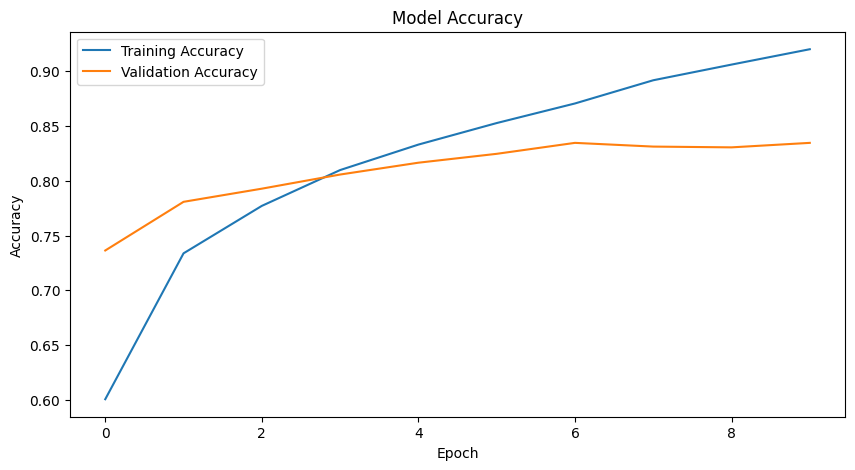

In [17]:
# Plotting training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

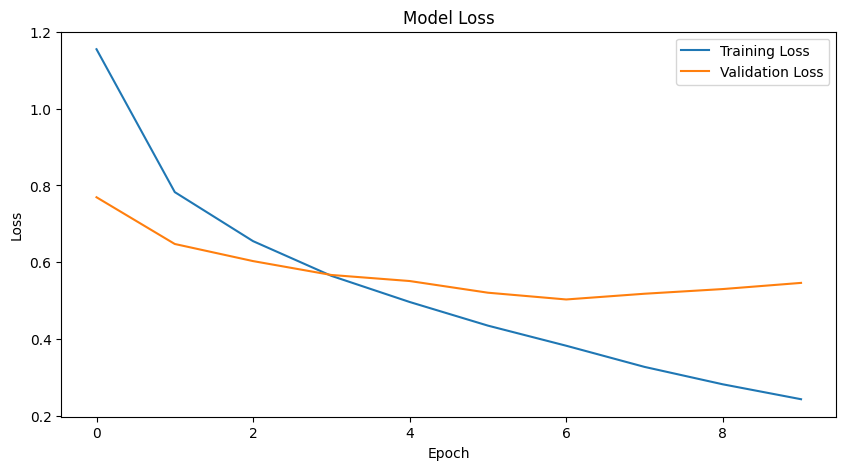

In [18]:
# Plotting training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [19]:
# Predicting on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


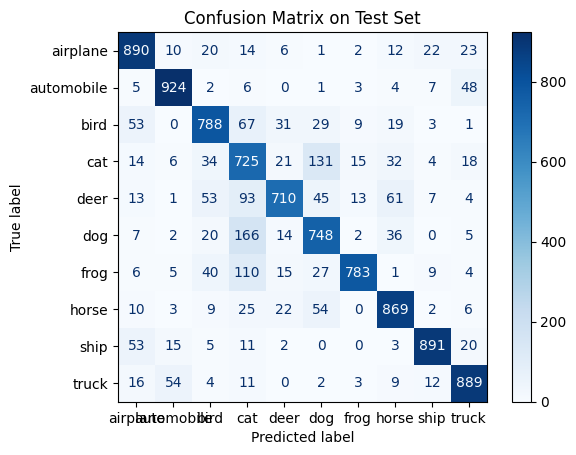

In [20]:
# Generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix on Test Set')
plt.show()

The Diagonal element clearly shows the corrrect prediction: i.e; instances whereby the true image matches the predicted image. The result here shows a high level of accuracy considerably